In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from implementations import *

# Use your own path here!
DATA_TRAIN_PATH = '/Users/jiaanzhu/Desktop/MLProject1/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

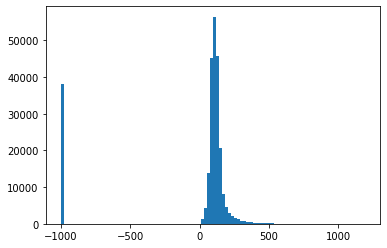

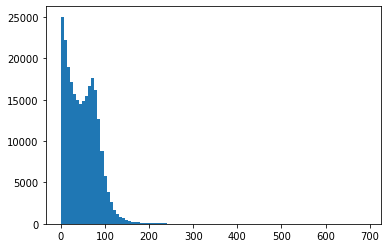

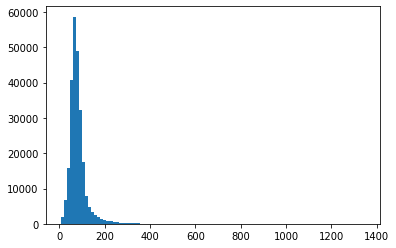

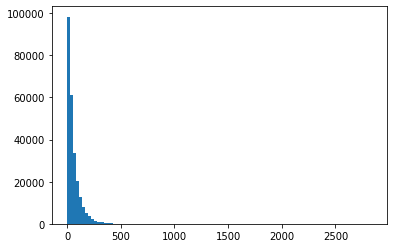

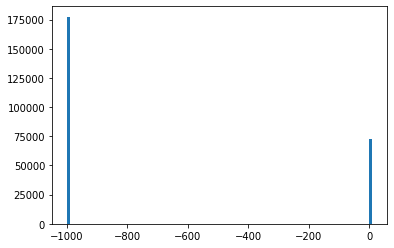

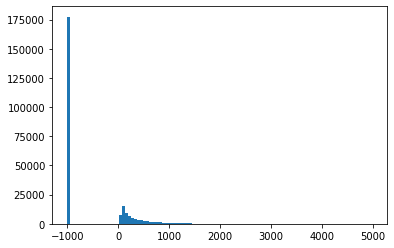

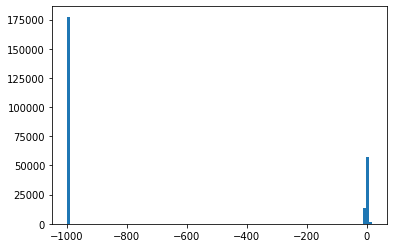

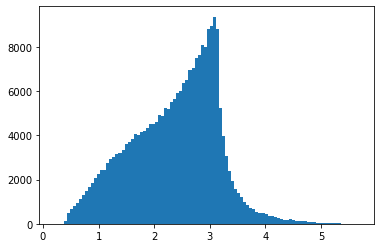

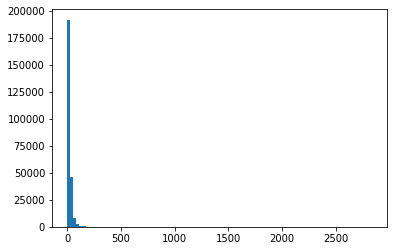

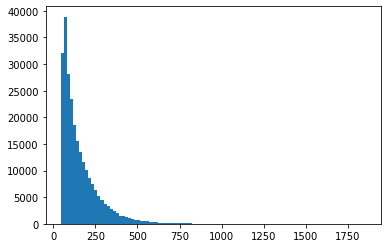

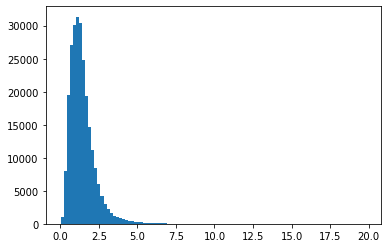

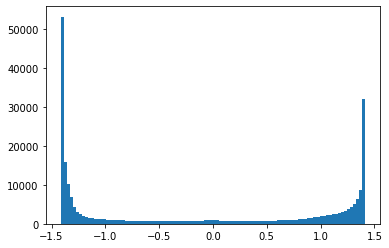

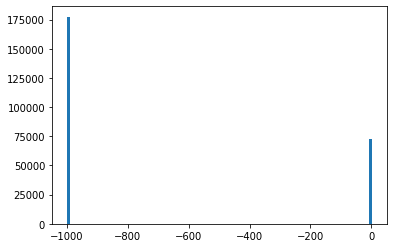

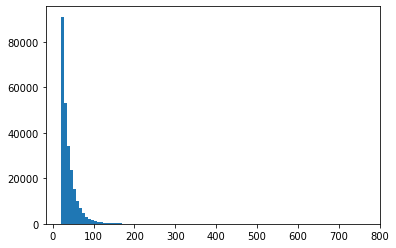

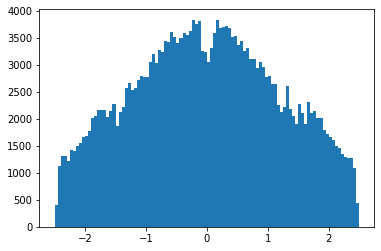

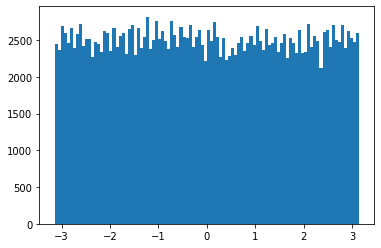

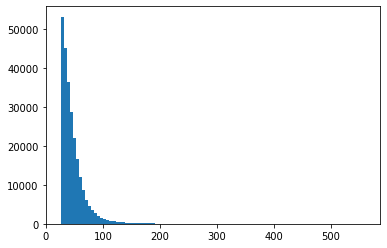

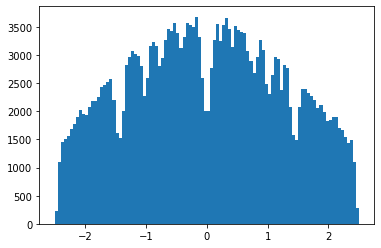

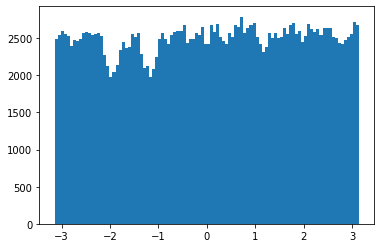

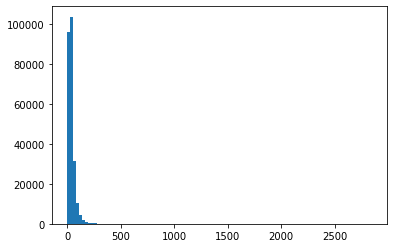

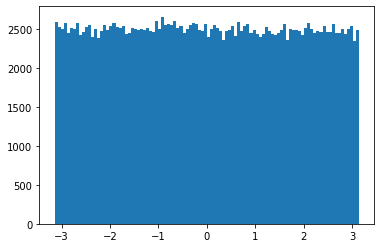

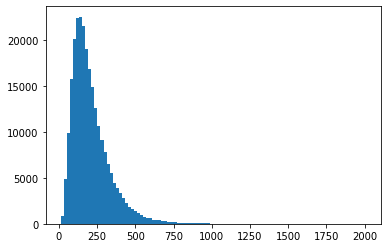

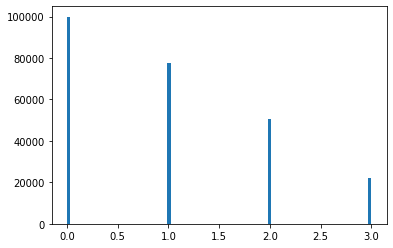

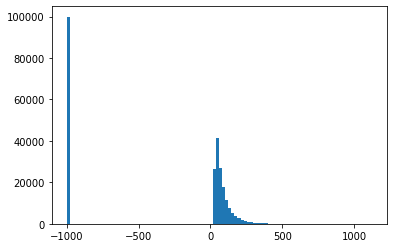

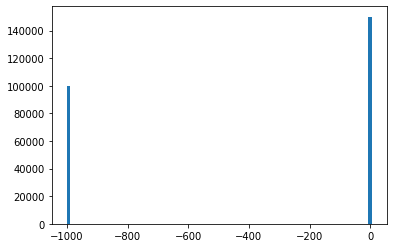

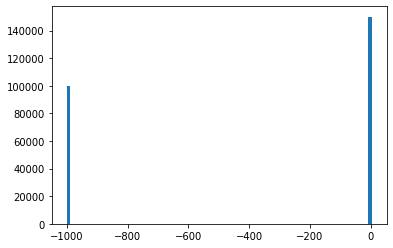

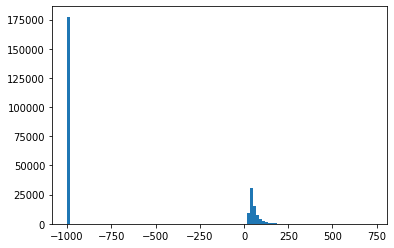

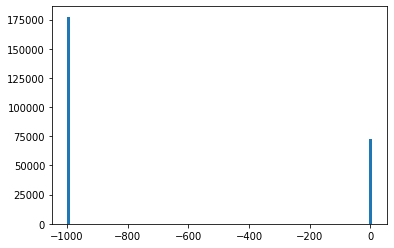

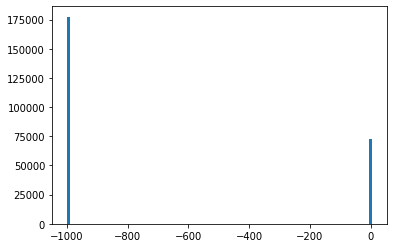

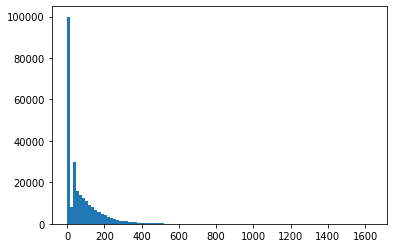

In [2]:
# Look at distribution of Train data
for i in range(tX.shape[1]):
    plt.figure()
    plt.hist(tX[:,i], bins = 100)
    plt.show()

In [3]:
tx = tX.copy() # Make a copy of train data

In [4]:
y_0 = y[tx[:,22] == 0]
y_1 = y[tx[:,22] == 1]
y_2 = y[tx[:,22] == 2]
y_3 = y[tx[:,22] == 3]
# y_2 = np.append(y_2, y_3, axis = 0)

In [5]:
tx_0 = tx[tx[:,22] == 0]
tx_1 = tx[tx[:,22] == 1]
tx_2 = tx[tx[:,22] == 2]
tx_3 = tx[tx[:,22] == 3]
# tx_2 = np.append(tx_2, tx_3, axis = 0)

In [6]:
tx_01 = np.delete(tx_0, 22, 1)
tx_11 = np.delete(tx_1, 22, 1)
tx_21 = np.delete(tx_2, 22, 1)
tx_31 = np.delete(tx_3, 22, 1)

In [7]:
tx_01 = np.delete(tx_01, [4,5,6,12,22,23,24,25,26,27,28], 1)
tx_11 = np.delete(tx_11, [4,5,6,12,25,26,27], 1)

In [8]:
tx_01_1 = tx_01[tx_01[:,0] == -999]
tx_01_2 = tx_01[tx_01[:,0] != -999]
tx_11_1 = tx_11[tx_11[:,0] == -999]
tx_11_2 = tx_11[tx_11[:,0] != -999]
tx_21_1 = tx_21[tx_21[:,0] == -999]
tx_21_2 = tx_21[tx_21[:,0] != -999]
tx_31_1 = tx_31[tx_31[:,0] == -999]
tx_31_2 = tx_31[tx_31[:,0] != -999]

In [9]:
tx_01_1 = np.delete(tx_01_1, 0, 1)
tx_11_1 = np.delete(tx_11_1, 0, 1)
tx_21_1 = np.delete(tx_21_1, 0, 1)
tx_31_1 = np.delete(tx_31_1, 0, 1)

In [10]:
y_0_1 = y_0[tx_01[:,0] == -999]
y_0_2 = y_0[tx_01[:,0] != -999]
y_1_1 = y_1[tx_11[:,0] == -999]
y_1_2 = y_1[tx_11[:,0] != -999]
y_2_1 = y_2[tx_21[:,0] == -999]
y_2_2 = y_2[tx_21[:,0] != -999]
y_3_1 = y_3[tx_31[:,0] == -999]
y_3_2 = y_3[tx_31[:,0] != -999]

In [11]:
tx_01_2[:, 15] = tx_01_2[:, 15] + 25

In [1789]:
'''
tx_01_1_1 = tx_01_1[y_0_1 == -1]
tx_01_1_2 = tx_01_1[y_0_1 == 1]
'''

In [1790]:
'''
tx_01_2_1 = tx_01_2[y_0_2 == -1]
tx_01_2_2 = tx_01_2[y_0_2 == 1]
'''

In [1791]:
'''
y_0_1_1 = y_0_1[y_0_1 == -1]
y_0_1_2 = y_0_1[y_0_1 == 1]
y_0_2_1 = y_0_2[y_0_2 == -1]
y_0_2_2 = y_0_2[y_0_2 == 1]
'''

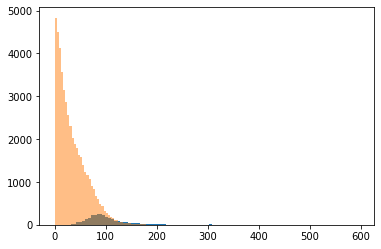

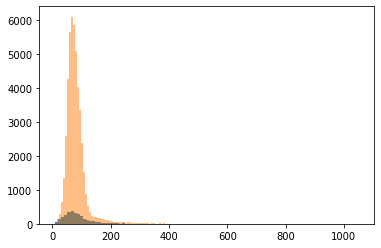

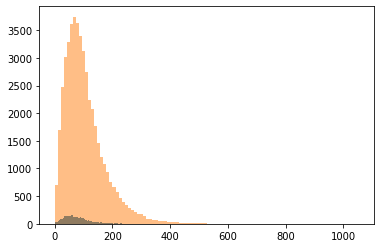

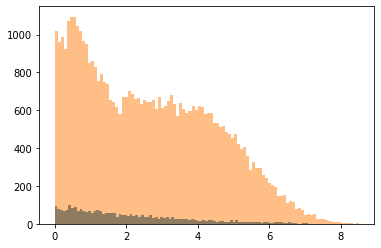

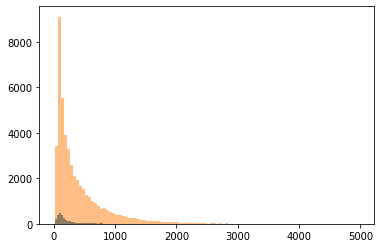

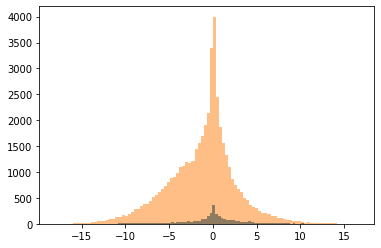

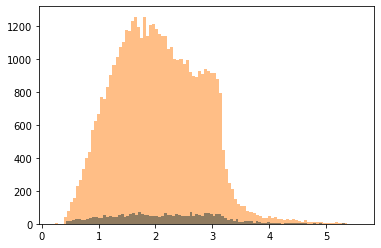

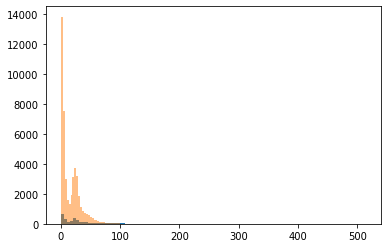

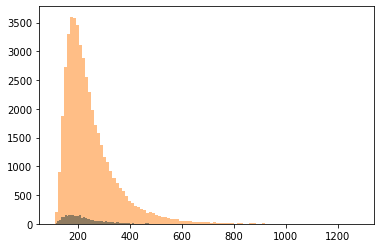

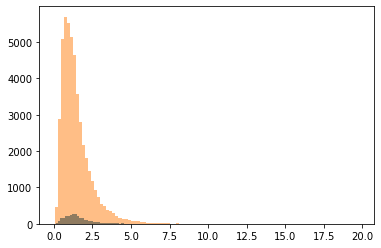

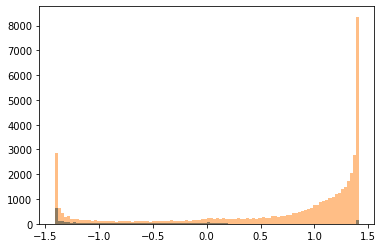

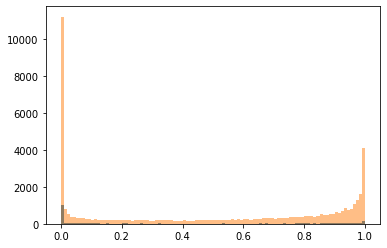

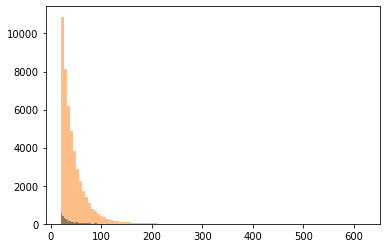

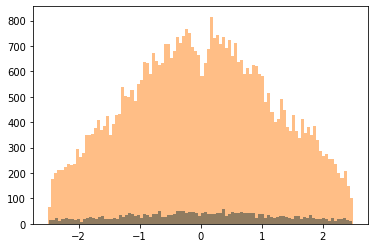

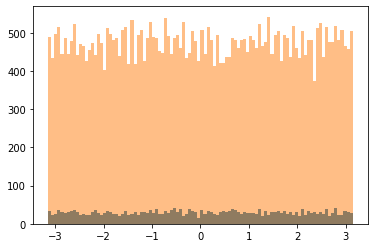

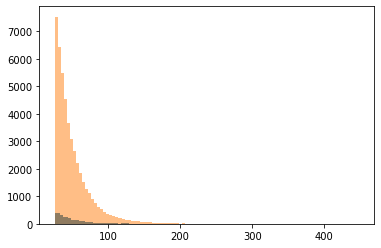

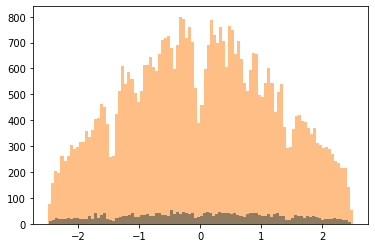

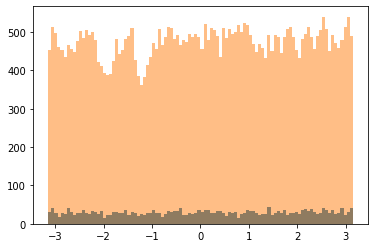

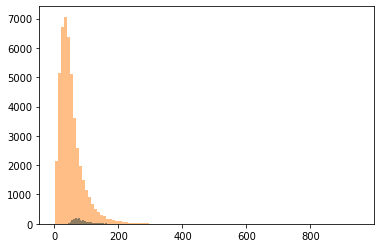

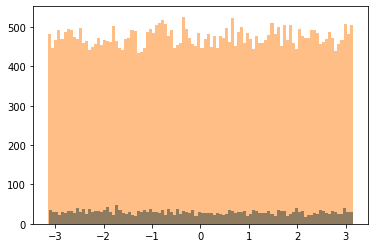

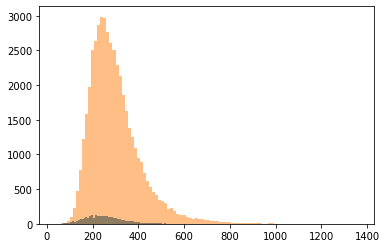

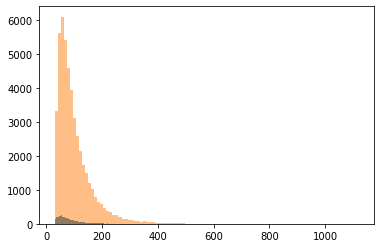

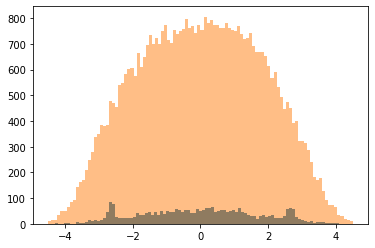

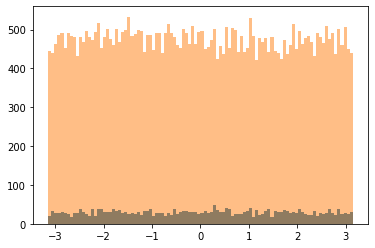

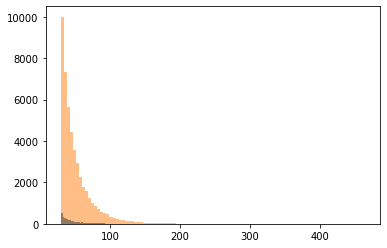

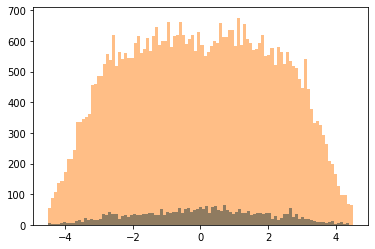

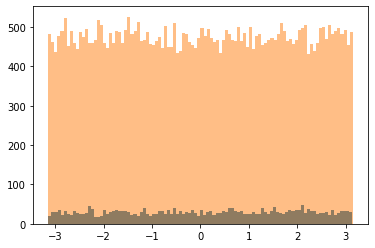

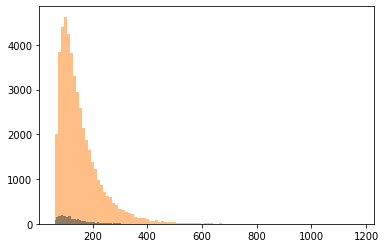

In [2369]:
'''
for i in range(tx_21_1.shape[1]):
    plt.figure()
    plt.hist(tx_21_1[:,i], bins = 100, alpha = 1)
    plt.hist(tx_21_2[:,i+1], bins = 100, alpha = 0.5)
    plt.show()
'''

In [ ]:
'''
for i in range(tx_01_1.shape[1]):
    plt.figure()
    plt.hist(tx_01_1[:,i], bins = 100, alpha = 1)
    plt.hist(tx_01_2[:,i+1], bins = 100, alpha = 0.5)
    plt.show()
'''

In [ ]:
# Below, remove outliers in train data

In [12]:
# IQR Method
def iqr(tx, y, ind):
    tx_new = tx #np.delete(tx, [11,22], 1)

    q25, q75 = np.nanpercentile(tx_new, 25, axis=0), np.nanpercentile(tx_new, 75, axis=0)
    iqr = q75 - q25
    cut_off = iqr * ind # Remove extreme value 
    lower, upper = q25 - cut_off, q75 + cut_off

    # Compare each row with lower & upper, for those < lower or > upper, record in outlier_index
    outlier_index = []
    for i in range(tx_new.shape[0]):
        if np.any(tx_new[i, :] < lower) or np.any(tx_new[i, :] > upper):
            outlier_index.append(i)

    # Remove outlier
    tx = np.delete(tx, outlier_index, axis = 0)
    y = np.delete(y, outlier_index, axis = 0)
    return tx, y

In [ ]:
'''
tx_01_1, y_0_1 = iqr(tx_01_1, y_0_1)
tx_01_2, y_0_2 = iqr(tx_01_2, y_0_2)
'''

In [ ]:
'''
tx_01_1_1, y_0_1_1 = iqr(tx_01_1_1, y_0_1_1)
tx_01_1_2, y_0_1_2 = iqr(tx_01_1_2, y_0_1_2)
'''

In [ ]:
'''
tx_01_2_1, y_0_2_1 = iqr(tx_01_2_1, y_0_2_1)
tx_01_2_2, y_0_2_2 = iqr(tx_01_2_2, y_0_2_2)
'''

In [42]:
tx_01_1, y_0_1 = iqr(tx_01_1, y_0_1, 11)
# tx_01_1_1, y_0_1_1 = iqr(tx_01_1_1, y_0_1_1)
# tx_01_1_2, y_0_1_2 = iqr(tx_01_1_2, y_0_1_2)
tx_01_2, y_0_2 = iqr(tx_01_2, y_0_2, 7)
# tx_01_2_1, y_0_2_1 = iqr(tx_01_2_1, y_0_2_1)
# tx_01_2_2, y_0_2_2 = iqr(tx_01_2_2, y_0_2_2)
tx_11_1, y_1_1 = iqr(tx_11_1, y_1_1, 11)
tx_11_2, y_1_2 = iqr(tx_11_2, y_1_2, 5)
tx_21_1, y_2_1 = iqr(tx_21_1, y_2_1, 17)
tx_21_2, y_2_2 = iqr(tx_21_2, y_2_2, 9)
tx_31_1, y_3_1 = iqr(tx_31_1, y_3_1, 19)
tx_31_2, y_3_2 = iqr(tx_31_2, y_3_2, 15)

In [43]:
print(tx_01_1.shape[0]+tx_01_2.shape[0]+tx_11_1.shape[0]+tx_11_2.shape[0]+tx_21_1.shape[0]+tx_21_2.shape[0]+tx_31_1.shape[0]+tx_31_2.shape[0])

247267


In [114]:
# Dealing with -999 below

In [136]:
# Replace -999.0 with mean of each column
# tx = np.where(tx2 == -999, np.ma.array(tx2, mask= (tx2 == -999)).mean(axis=0), tx2) 
# tx = np.where(tx == -999, np.ma.array(tX, mask= (tX == -999)).mean(axis=0), tx) 
# tx_0 = np.where(tx_01 == -999, np.ma.array(tx_01, mask= (tx_01 == -999)).mean(axis=0), tx_01)
# tx_1 = np.where(tx_11 == -999, np.ma.array(tx_11, mask= (tx_11 == -999)).mean(axis=0), tx_11)
# tx_2 = np.where(tx_21 == -999, np.ma.array(tx_21, mask= (tx_21 == -999)).mean(axis=0), tx_21)
# tx_3 = np.where(tx_31 == -999, np.ma.array(tx_31, mask= (tx_31 == -999)).mean(axis=0), tx_31)
# Replace -999.0 with median of each column

# tx = np.where(tX != -999, tX, np.nan) # Replace -999 with nan
# col_median = np.nanmedian(tx, axis = 0) # Calculate median of each column
# inds_train = np.where(np.isnan(tx)) # find indices where nan value is present 
# replace inds with median of column 
# tx[inds_train] = np.take(col_median, inds_train[1]) # replace inds with median of column 


# Remove columns contain -999


# tx = tX[:, ~np.any(tX == -999, axis=0)]


# Remove columns with number of NaNs > 50%, then replace -999.0 with mean of each column

# remove_index = np.argwhere(np.count_nonzero(tX == -999, axis=0) > tX.shape[0]/2)
# tX2 = np.delete(tX, remove_index, 1)
# tx = np.where(tX2 == -999, np.ma.array(tX2, mask= (tX2 == -999)).mean(axis=0), tX2) 


# Extra code
# np.count_nonzero(tX == -999, axis=0)
# tx = np.where(tX != -999, tX, np.nan)  # Replace -999 with nan
# tx = np.where(np.isnan(tx2), np.ma.array(tx2, mask = np.isnan(tx2)).mean(axis=0), tx2)  # Replace nan with mean of each column

In [1707]:
# Standardize data
# tx = standardize(tx)
# tx_01_1 = standardize(tx_01_1)
# tx_01_2 = standardize(tx_01_2)
# tx_11_1 = standardize(tx_11_1)
# tx_11_2 = standardize(tx_11_2)
# tx_21_1 = standardize(tx_21_1)
# tx_21_2 = standardize(tx_21_2)
# tx_31_1 = standardize(tx_31_1)
# tx_31_2 = standardize(tx_31_2)


In [1646]:
# Normalize data
# tx = normalize(tx)
# tx_01_1 = normalize(tx_01_1)
# tx_01_2 = normalize(tx_01_2)
# tx_11_1 = normalize(tx_11_1)
# tx_11_2 = normalize(tx_11_2)
# tx_21_1 = normalize(tx_21_1)
# tx_21_2 = normalize(tx_21_2)
# tx_31_1 = normalize(tx_31_1)
# tx_31_2 = normalize(tx_31_2)

In [44]:
# Augment
degree1_1 = 7
degree1_2 = 8 #10 with shift in column 15 #or 4
degree2_1 = 4
degree2_2 = 9
degree3_1 = 2
degree3_2 = 8
degree4_1 = 1
degree4_2 = 10
tx_01_1 = build_poly(np.transpose(tx_01_1), degree1_1)
tx_01_2 = build_poly(np.transpose(tx_01_2), degree1_2)
tx_11_1 = build_poly(np.transpose(tx_11_1), degree2_1)
tx_11_2 = build_poly(np.transpose(tx_11_2), degree2_2)
tx_21_1 = build_poly(np.transpose(tx_21_1), degree3_1)
tx_21_2 = build_poly(np.transpose(tx_21_2), degree3_2)
tx_31_1 = build_poly(np.transpose(tx_31_1), degree4_1)
tx_31_2 = build_poly(np.transpose(tx_31_2), degree4_2)

In [13]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [14]:
def cross_validation_degree(y, x, k_indices, k, lambda_, degree, ind, threshold = 0):
    """return the loss of ridge regression."""
    # ***************************************************
    x_te = x[k_indices[k], :]
    x_tr = x[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten(), :]
    y_te = y[k_indices[k]]
    y_tr = y[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten()]
    size = y_te.shape[0]
    
    x_tr, y_tr = iqr(x_tr, y_tr, ind)
    size2 = y_tr.shape[0]
    # get k'th subgroup in test, others in train
    # ***************************************************
    # ***************************************************                   
    x_tr_poly = build_poly(np.transpose(x_tr), degree)
    x_te_poly = build_poly(np.transpose(x_te), degree)
    
    # form data with polynomial degree
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    mse, weights = ridge_regression(np.transpose(np.matrix(y_tr)), x_tr_poly, lambda_)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    y_pred = predict_labels(weights, x_te_poly, threshold)
    y_pred2 = predict_labels(weights, x_tr_poly, threshold)
    y_te = np.expand_dims(y_te, axis=1)
    y_tr = np.expand_dims(y_tr, axis=1)
    # loss_tr = compute_mse(np.transpose(np.matrix(y_tr)), x_tr_poly, weights)
    # loss_te = compute_mse(np.transpose(np.matrix(y_te)), x_te_poly, weights)
    # ***************************************************
    return sum(y_pred == y_te)/size, sum(y_pred2 == y_tr)/size2


In [15]:
def check_degree_visualization(degrees, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.plot(degrees, mse_tr, marker=".", color='b', label='Accuracy')
    plt.plot(degrees, mse_te, marker=".", color='r', label='Accuracy')
    plt.xlabel("degree")
    plt.ylabel("Accuracy")
    plt.title("cross validation for degree")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [16]:
def check_degree_demo(x, y, ind):
    seeds = range(100)
    degrees = range(1, 12)
    lambda_ = 0
    k_fold = 4
    mean_accu = np.empty((len(seeds), len(degrees)))
    mean_accu2 = np.empty((len(seeds), len(degrees)))
    for seed in seeds:
        # degree = 5
        # y = y_1_1
        # x = tx_11_1
        # lambdas = np.logspace(-30, 10, 41)
        # split data in k fold
        k_indices = build_k_indices(y, k_fold, seed)
        # define lists to store the loss of training data and test data
        # ***************************************************
        for degree in degrees:
            accu = []
            accu2 = []
            for k in range(k_fold):            
                te, tr = cross_validation_degree(y, x, k_indices, k, lambda_, degree, ind, 0)
                accu.append(te)
                accu2.append(tr)
            mean_accu[seed, degree-1] = np.mean(accu)
            mean_accu2[seed, degree-1] = np.mean(accu2)
        # *************************************************** 
    mean_accu_av = np.mean(mean_accu, axis = 0)
    mean_accu2_av = np.mean(mean_accu2, axis = 0)
    check_degree_visualization(degrees, mean_accu_av, mean_accu2_av)
    maxi = max(mean_accu_av)
    print(maxi, np.where(mean_accu_av == maxi))

In [17]:
def cross_validation_idx(y, x, k_indices, k, lambda_, degree, ind, threshold = 0):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE  
    x_te = x[k_indices[k], :]
    x_tr = x[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten(), :]
    y_te = y[k_indices[k]]
    y_tr = y[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten()]
    size = y_te.shape[0]
    
    x_tr, y_tr = iqr(x_tr, y_tr, ind)
    size2 = y_tr.shape[0]
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    # ***************************************************                   
    x_tr_poly = build_poly(np.transpose(x_tr), degree)
    x_te_poly = build_poly(np.transpose(x_te), degree)
    
    # form data with polynomial degree: TODO
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    mse, weights = ridge_regression(np.transpose(np.matrix(y_tr)), x_tr_poly, lambda_)
    # ridge regression: TODO
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    y_pred = predict_labels(weights, x_te_poly, threshold)
    y_pred2 = predict_labels(weights, x_tr_poly, threshold)
    y_te = np.expand_dims(y_te, axis=1)
    y_tr = np.expand_dims(y_tr, axis=1)
    # loss_tr = compute_mse(np.transpose(np.matrix(y_tr)), x_tr_poly, weights)
    # loss_te = compute_mse(np.transpose(np.matrix(y_te)), x_te_poly, weights)
    # ***************************************************
    return sum(y_pred == y_te)/size, sum(y_pred2 == y_tr)/size2

In [18]:
def check_ind_visualization(inds, te, tr):
    """visualization the curves of mse_tr and mse_te."""
    plt.plot(inds, te, marker=".", color='b', label='Accuracy')
    plt.plot(inds, tr, marker=".", color='r', label='Accuracy')
    plt.xlabel("iqr index")
    plt.ylabel("Accuracy")
    plt.title("cross validation for iqr")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [19]:
def check_ind_demo(x, y):
    seeds = range(100)
    degree = 1
    inds = range(1, 33, 2)
    lambda_ = 0
    mean_accu = np.empty((len(seeds), len(inds)))
    mean_accu2 = np.empty((len(seeds), len(inds)))
    for seed in seeds:
        # degree = 5
        k_fold = 4
        # y = y_1_1
        # x = tx_11_1
        k_indices = build_k_indices(y, k_fold, seed)
        # lambdas = np.logspace(-30, 10, 41)
        # split data in k fold
        # define lists to store the loss of training data and test data
        # ***************************************************
        for index_ind, ind in enumerate(inds):
            accu = []
            accu2 = []
            for k in range(k_fold):            
                te, tr = cross_validation_idx(y, x, k_indices, k, lambda_, degree, ind, 0)
                accu.append(te)
                accu2.append(tr)
            mean_accu[seed, index_ind] = np.mean(accu)
            mean_accu2[seed, index_ind] = np.mean(accu2)
        # *************************************************** 
    mean_accu_av = np.mean(mean_accu, axis = 0)
    mean_accu2_av = np.mean(mean_accu2, axis = 0)
    check_ind_visualization(inds, mean_accu_av, mean_accu2_av)
    dist = mean_accu2_av - mean_accu_av
    mini = min(dist)
    print(mini, np.where(dist == mini))

In [20]:
def check_lambda_visualization(lambds, te, tr):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, te, marker=".", color='b', label='Accuracy')
    plt.semilogx(lambds, tr, marker=".", color='r', label='Accuracy')
    plt.xlabel("lambda")
    plt.ylabel("Accuracy")
    plt.title("cross validation of lambda")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [21]:
def cross_lambda_validation(y, x, k_indices, k, lambda_, degree, ind, threshold = 0):
    """return the loss of ridge regression."""
    x_te = x[k_indices[k], :]
    x_tr = x[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten(), :]
    y_te = y[k_indices[k]]
    y_tr = y[np.squeeze(np.array(np.delete(k_indices, k, 0))).flatten()]
    size = y_te.shape[0]
    
    x_tr, y_tr = iqr(x_tr, y_tr, ind)
    size2 = y_tr.shape[0] 
    
    # form data with polynomial degree                
    x_tr_poly = build_poly(np.transpose(x_tr), degree)
    x_te_poly = build_poly(np.transpose(x_te), degree)
    # ridge regression
    mse, weights = ridge_regression(np.transpose(np.matrix(y_tr)), x_tr_poly, lambda_)      
    
    y_pred = predict_labels(weights, x_te_poly, threshold)
    y_pred2 = predict_labels(weights, x_tr_poly, threshold)
    y_te = np.expand_dims(y_te, axis=1)
    y_tr = np.expand_dims(y_tr, axis=1)

    return sum(y_pred == y_te)/size, sum(y_pred2 == y_tr)/size2

In [22]:
def check_lambda_demo(x, y, ind, degree):
    seeds = range(100)
    lambdas = np.logspace(-10, 0, 11)
    mean_accu = np.empty((len(seeds), len(lambdas)))
    mean_accu2 = np.empty((len(seeds), len(lambdas)))
    for seed in seeds:
        k_fold = 4
        k_indices = build_k_indices(y, k_fold, seed)
        for index_lambda, lambda_ in enumerate(lambdas):
            accu = []
            accu2 = []
            for k in range(k_fold):            
                te, tr  = cross_lambda_validation(y, x, k_indices, k, lambda_, degree, ind, 0)
                accu.append(te)
                accu2.append(tr)
            mean_accu[seed, index_lambda] = np.mean(accu)
            mean_accu2[seed, index_lambda] = np.mean(accu2)
    mean_accu_av = np.mean(mean_accu, axis = 0)
    mean_accu2_av = np.mean(mean_accu2, axis = 0)
    check_lambda_visualization(lambdas, mean_accu_av, mean_accu2_av)
    maxi = max(mean_accu_av)
    print(maxi, np.where(mean_accu_av == maxi))

In [939]:
'''
def check_threshold_demo(x, y):
    seeds = range(100)
    thresholds = np.linspace(-0.1, 0.1, 11)
    degree = 9
    rmse_tr = np.empty((len(seeds), len(thresholds)))
    rmse_te = np.empty((len(seeds), len(thresholds)))
    for seed in seeds:
        # degree = 5
        lambda_ = 10 ** -10
        k_fold = 4
        # y = y_1_1
        # x = tx_11_1
        # lambdas = np.logspace(-30, 10, 41)
        # split data in k fold
        k_indices = build_k_indices(y, k_fold, seed)
        # define lists to store the loss of training data and test data
        # ***************************************************
        for threshold in thresholds:
            tr = []
            te = []
            for k in range(k_fold):            
                loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree, threshold)
                tr.append(loss_tr)
                te.append(loss_te)
            rmse_tr[seed, np.where(thresholds == threshold)] = np.mean(tr)
            rmse_te[seed, np.where(thresholds == threshold)] = np.mean(te)
        # *************************************************** 
    rmse_tr = np.mean(rmse_tr, axis = 0)
    rmse_te = np.mean(rmse_te, axis = 0)
    cross_validation_visualization(thresholds, rmse_tr, rmse_te)
    maxi = max(rmse_tr)
    print(maxi, np.where(rmse_tr == maxi))
'''

0.0011355523104473741 (array([9]),)


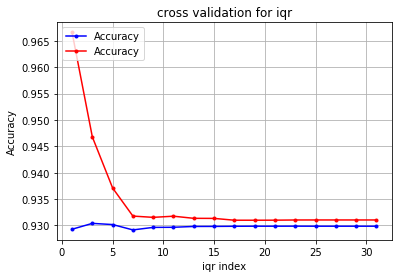

In [2339]:
check_ind_demo(tx_31_1, y_3_1)

0.0011414988622465705 (array([10]),)


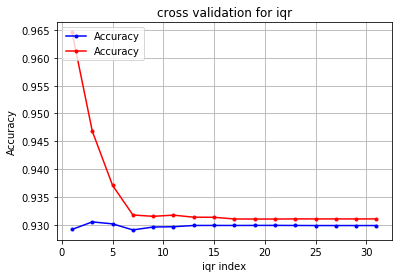

In [2322]:
check_ind_demo(tx_31_1, y_3_1)

0.00013957361330951823 (array([4]),)


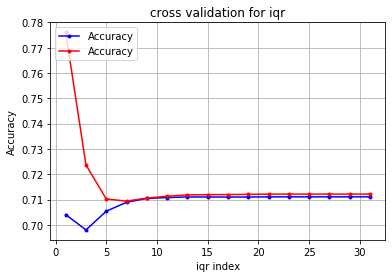

In [2325]:
check_ind_demo(tx_31_2, y_3_2)

0.0017253453042478384 (array([8]),)


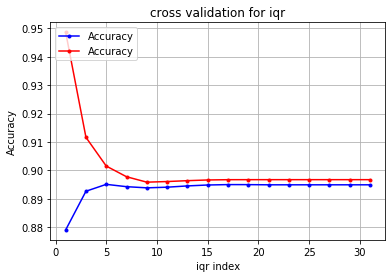

In [2327]:
check_ind_demo(tx_21_1, y_2_1)

0.0005351877170859387 (array([9]),)


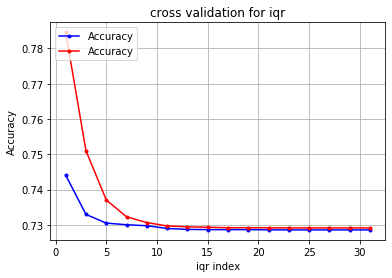

In [2328]:
check_ind_demo(tx_21_2, y_2_2)

0.00031524879447764054 (array([6]),)


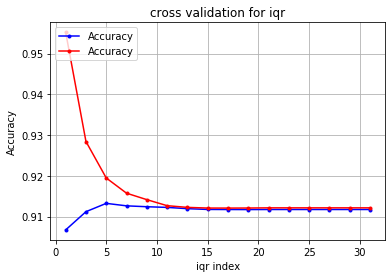

In [2329]:
check_ind_demo(tx_11_1, y_1_1)

0.00010517983627922334 (array([2]),)


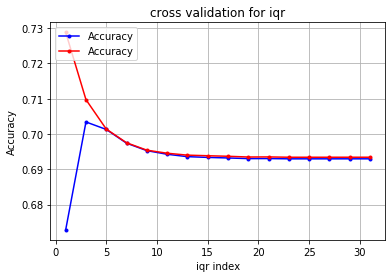

In [2330]:
check_ind_demo(tx_11_2, y_1_2)

0.00014487511512839557 (array([15]),)


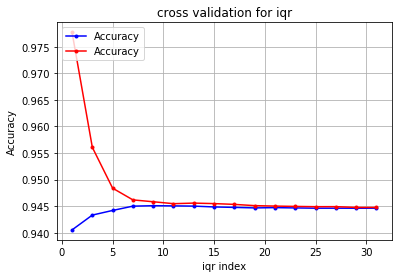

In [2331]:
check_ind_demo(tx_01_1, y_0_1)

9.80455755897891e-05 (array([2]),)


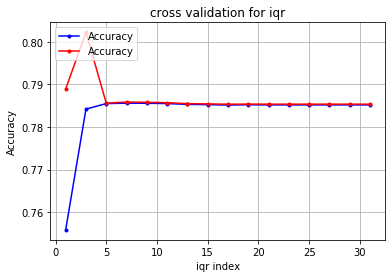

In [28]:
check_ind_demo(tx_01_2, y_0_2)

0.929884823848238 (array([0]),)


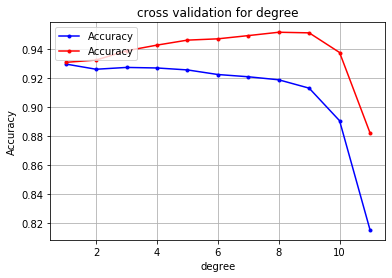

In [21]:
check_degree_demo(tx_31_1 ,y_3_1, 19)

0.8247974279636435 (array([9]),)


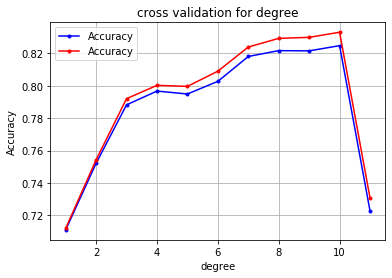

In [22]:
check_degree_demo(tx_31_2 ,y_3_2, 15)

0.9014430894308941 (array([1]),)


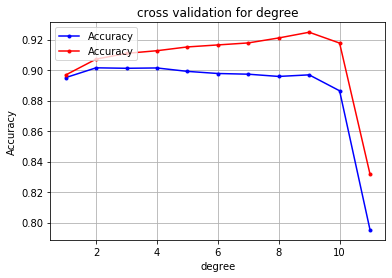

In [23]:
check_degree_demo(tx_21_1 ,y_2_1, 17)

0.8305676450742238 (array([7]),)


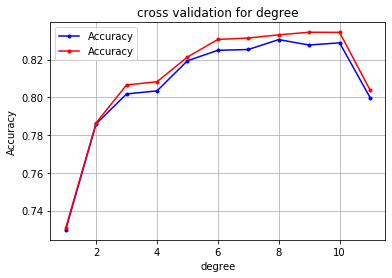

In [24]:
check_degree_demo(tx_21_2 ,y_2_2, 9)

0.9165357142857143 (array([3]),)


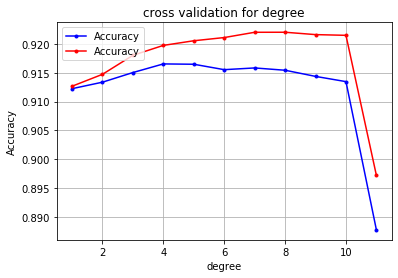

In [29]:
check_degree_demo(tx_11_1 ,y_1_1, 11)

0.7955940268648186 (array([8]),)


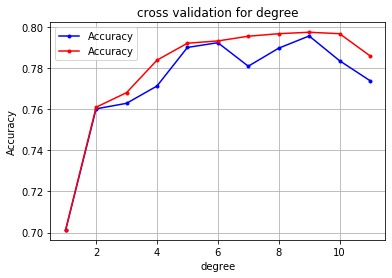

In [23]:
check_degree_demo(tx_11_2 ,y_1_2, 5)

0.9486707503828485 (array([6]),)


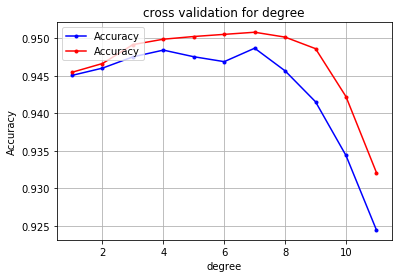

In [24]:
check_degree_demo(tx_01_1 ,y_0_1, 11)

0.8099350842955488 (array([7]),)


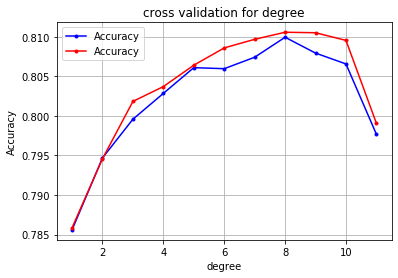

In [25]:
check_degree_demo(tx_01_2 ,y_0_2, 7)

0.930819783197832 (array([9]),)


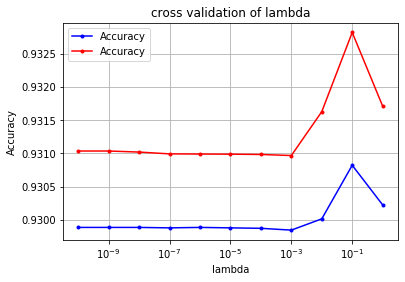

In [93]:
check_lambda_demo(tx_31_1 ,y_3_1, 19, 1)

0.8252049893637592 (array([5]),)


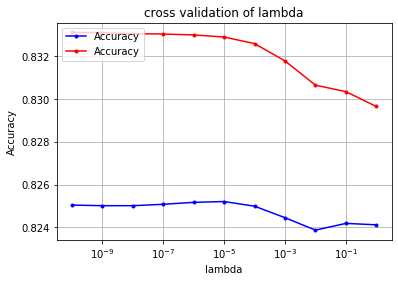

In [26]:
check_lambda_demo(tx_31_2 ,y_3_2, 15, 10)

0.9015616531165314 (array([2]),)


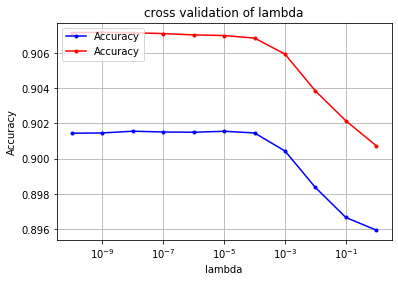

In [27]:
check_lambda_demo(tx_21_1 ,y_2_1, 17, 2)

0.8305828272604588 (array([1]),)


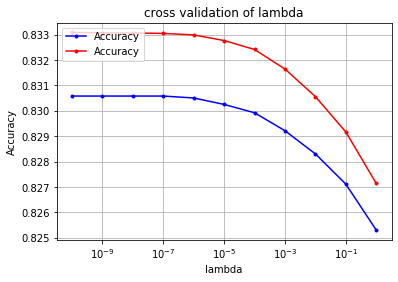

In [28]:
check_lambda_demo(tx_21_2 ,y_2_2, 9, 8)

0.9170582010582016 (array([10]),)


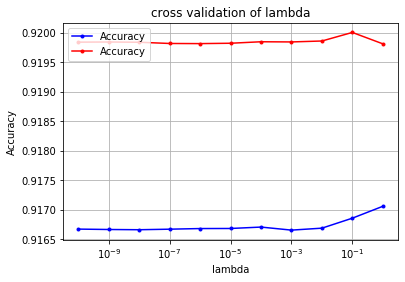

In [29]:
check_lambda_demo(tx_11_1 ,y_1_1, 11, 4)

0.7956956273220922 (array([0]),)


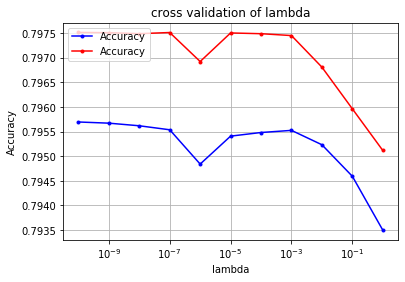

In [30]:
check_lambda_demo(tx_11_2 ,y_1_2, 5, 9)

0.9487052067381317 (array([8]),)


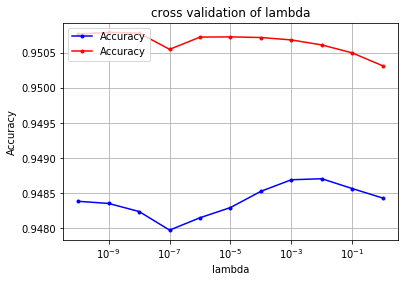

In [31]:
check_lambda_demo(tx_01_1 ,y_0_1, 11, 7)

0.8099539220469453 (array([1]),)


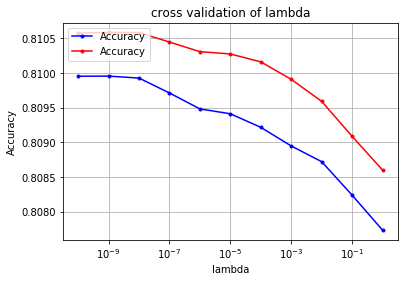

In [32]:
check_lambda_demo(tx_01_2 ,y_0_2, 7, 8)

In [1]:
# GD
# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.000000000000000000001

# Initialization
w_initial = np.zeros(tx.shape[1])
# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx.A, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

weights_sd = gradient_ws[-1] # Weights for gd
print(weights_sd) 
print(gradient_losses[-10:-1]) # Show changes in losses

NameError: name 'np' is not defined

In [5]:
# SGD
# Define the parameters of the algorithm.
max_iters = 5000
gamma = 0.00000000000000000000001
batch_size = 1

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx.A, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

weights_sgd = sgd_ws[-1] # Weights for sgd
print(weights_sgd)
print(sgd_losses[-10:-1]) # Show changes in losses


NameError: name 'tx' is not defined

In [2293]:
# LS
mse_0_1, weights_ls_0_1 = least_squares(np.transpose(np.matrix(y_0_1)), tx_01_1)
mse_0_2, weights_ls_0_2 = least_squares(np.transpose(np.matrix(y_0_2)), tx_01_2)
mse_1_1, weights_ls_1_1 = least_squares(np.transpose(np.matrix(y_1_1)), tx_11_1)
mse_1_2, weights_ls_1_2 = least_squares(np.transpose(np.matrix(y_1_2)), tx_11_2)
mse_2_1, weights_ls_2_1 = least_squares(np.transpose(np.matrix(y_2_1)), tx_21_1)
mse_2_2, weights_ls_2_2 = least_squares(np.transpose(np.matrix(y_2_2)), tx_21_2)
mse_3_1, weights_ls_3_1 = least_squares(np.transpose(np.matrix(y_3_1)), tx_31_1)
mse_3_2, weights_ls_3_2 = least_squares(np.transpose(np.matrix(y_3_2)), tx_31_2)

In [45]:
# RG
lambda_0_1 = 0
lambda_0_2 = 0
lambda_1_1 = 0
lambda_1_2 = 0
lambda_2_1 = 0
lambda_2_2 = 0
lambda_3_1 = 0
lambda_3_2 = 0
mse_0_1, weights_rg_0_1 = ridge_regression(np.transpose(np.matrix(y_0_1)), tx_01_1, lambda_0_1)
mse_0_2, weights_rg_0_2 = ridge_regression(np.transpose(np.matrix(y_0_2)), tx_01_2, lambda_0_2)
mse_1_1, weights_rg_1_1 = ridge_regression(np.transpose(np.matrix(y_1_1)), tx_11_1, lambda_1_1)
mse_1_2, weights_rg_1_2 = ridge_regression(np.transpose(np.matrix(y_1_2)), tx_11_2, lambda_1_2)
mse_2_1, weights_rg_2_1 = ridge_regression(np.transpose(np.matrix(y_2_1)), tx_21_1, lambda_2_1)
mse_2_2, weights_rg_2_2 = ridge_regression(np.transpose(np.matrix(y_2_2)), tx_21_2, lambda_2_2)
mse_3_1, weights_rg_3_1 = ridge_regression(np.transpose(np.matrix(y_3_1)), tx_31_1, lambda_3_1)
mse_3_2, weights_rg_3_2 = ridge_regression(np.transpose(np.matrix(y_3_2)), tx_31_2, lambda_3_2)
# print(mse_0, weights_rg_0, mse_1, weights_rg_1, mse_2, weights_rg_2, mse_3, weights_rg_3)

## Generate predictions and save ouput in csv format for submission:

In [46]:
# Use your own path here!
DATA_TEST_PATH = '/Users/jiaanzhu/Desktop/MLProject1/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

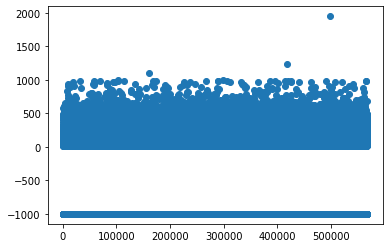

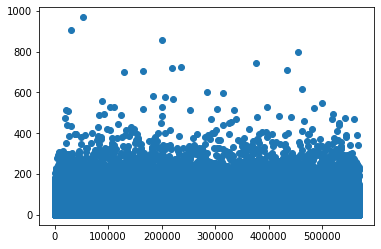

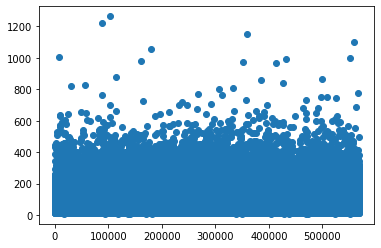

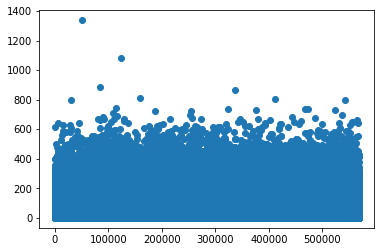

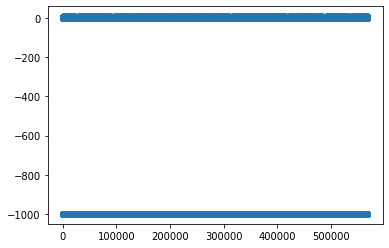

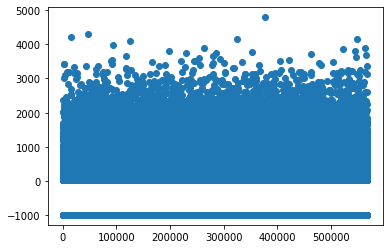

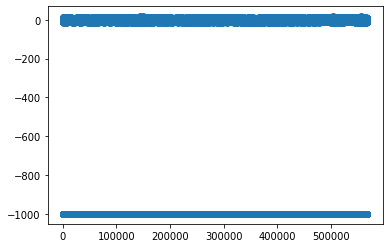

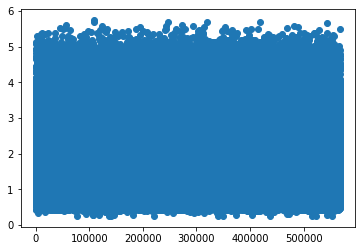

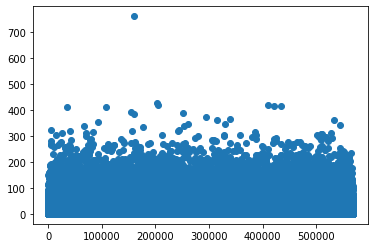

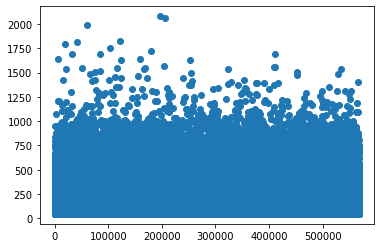

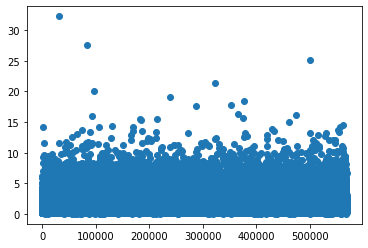

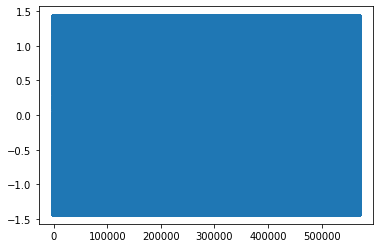

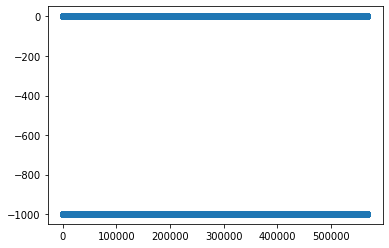

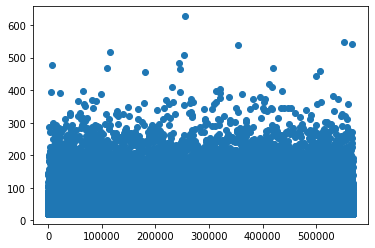

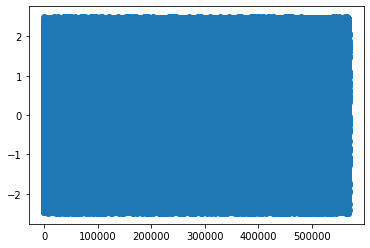

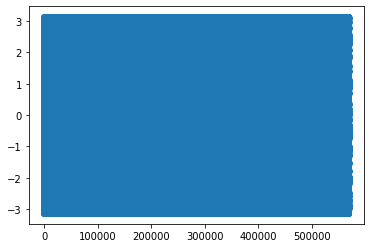

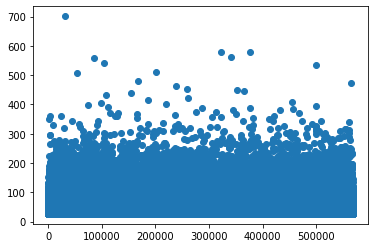

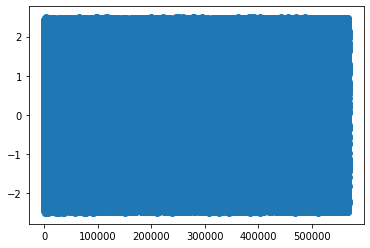

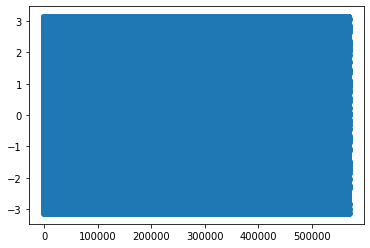

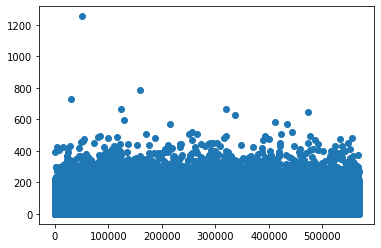

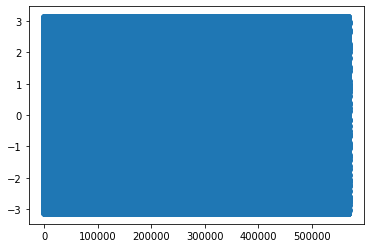

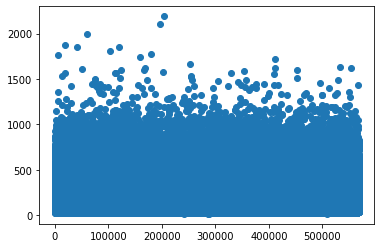

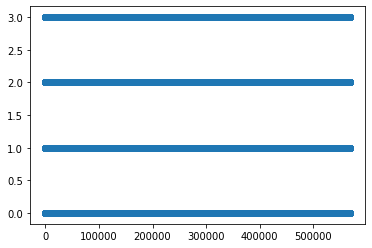

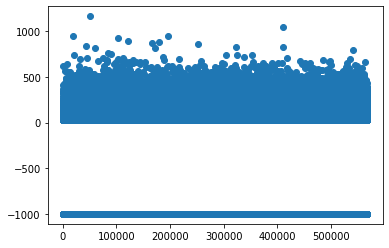

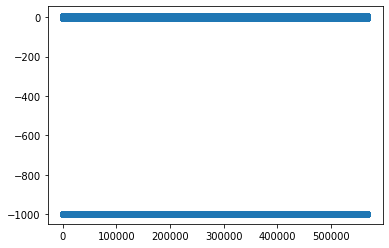

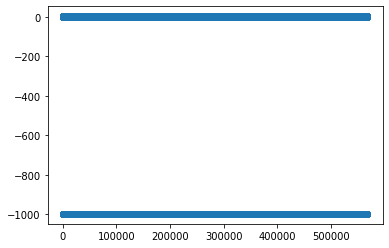

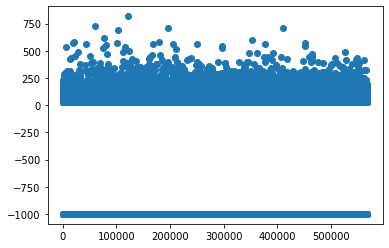

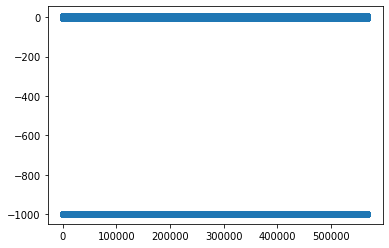

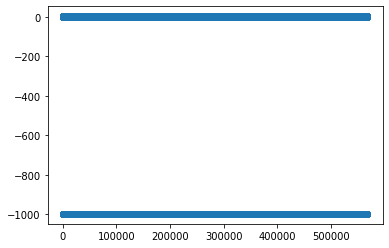

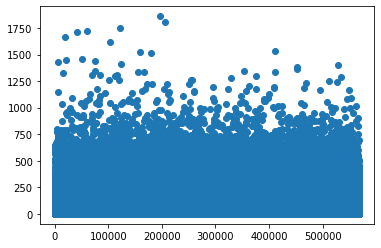

In [282]:
for i in range(tX_test.shape[1]):
    plt.figure()
    plt.scatter(range(tX_test.shape[0]), tX_test[:,i])
    plt.show()

In [47]:
# make a copy
# tx_test = tX_test[:, ~np.any(tX_test == -999, axis=0)]
tx_test = tX_test.copy()

In [48]:
tx_test_0 = tx_test[tx_test[:,22] == 0]
tx_test_1 = tx_test[tx_test[:,22] == 1]
tx_test_2 = tx_test[tx_test[:,22] == 2]
tx_test_3 = tx_test[tx_test[:,22] == 3]
# tx_test_2 = np.append(tx_test_2, tx_test_3, axis = 0)

In [49]:
tx_test_01 = np.delete(tx_test_0, 22, 1)
tx_test_11 = np.delete(tx_test_1, 22, 1)
tx_test_21 = np.delete(tx_test_2, 22, 1)
tx_test_31 = np.delete(tx_test_3, 22, 1)

In [50]:
tx_test_01 = np.delete(tx_test_01, [4,5,6,12,22,23,24,25,26,27,28], 1)
tx_test_11 = np.delete(tx_test_11, [4,5,6,12,25,26,27], 1)

In [51]:
tx_test_01_1 = tx_test_01[tx_test_01[:,0] == -999]
tx_test_01_2 = tx_test_01[tx_test_01[:,0] != -999]
tx_test_11_1 = tx_test_11[tx_test_11[:,0] == -999]
tx_test_11_2 = tx_test_11[tx_test_11[:,0] != -999]
tx_test_21_1 = tx_test_21[tx_test_21[:,0] == -999]
tx_test_21_2 = tx_test_21[tx_test_21[:,0] != -999]
tx_test_31_1 = tx_test_31[tx_test_31[:,0] == -999]
tx_test_31_2 = tx_test_31[tx_test_31[:,0] != -999]

In [52]:
tx_test_01_1 = np.delete(tx_test_01_1, 0, 1)
tx_test_11_1 = np.delete(tx_test_11_1, 0, 1)
tx_test_21_1 = np.delete(tx_test_21_1, 0, 1)
tx_test_31_1 = np.delete(tx_test_31_1, 0, 1)

In [53]:
tx_test_01_2[:, 15] = tx_test_01_2[:, 15] + 25

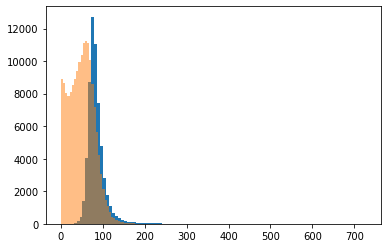

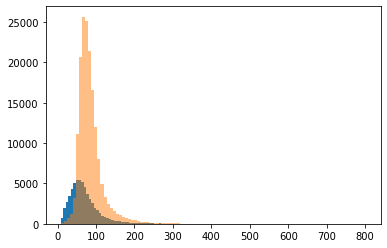

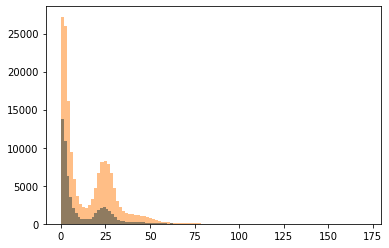

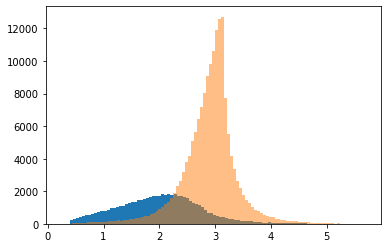

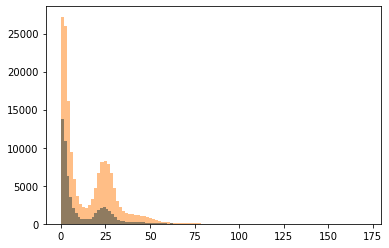

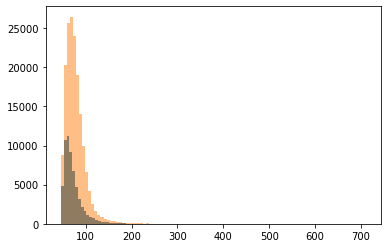

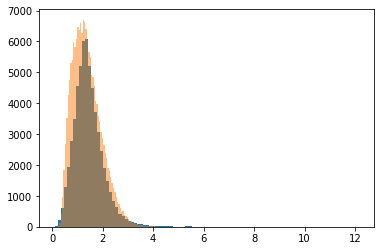

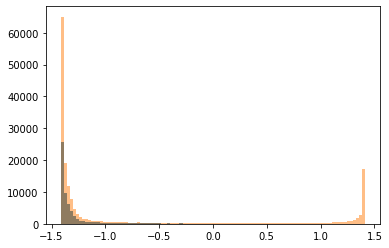

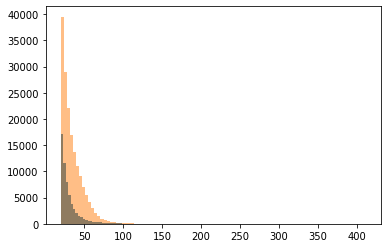

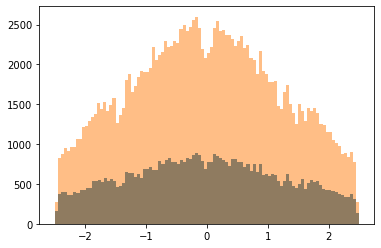

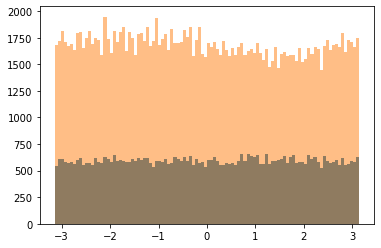

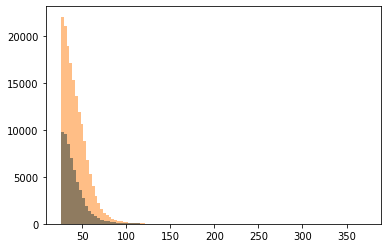

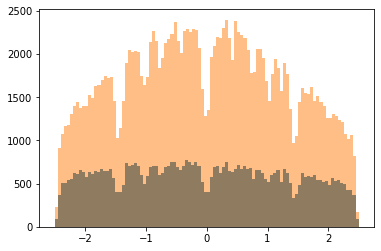

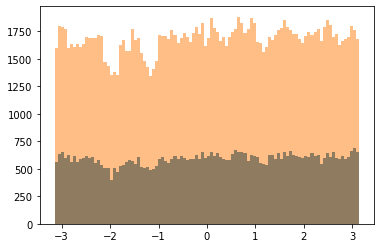

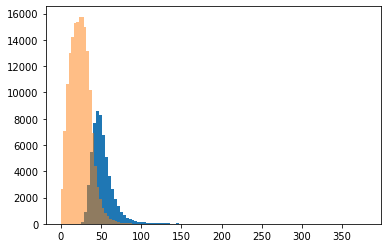

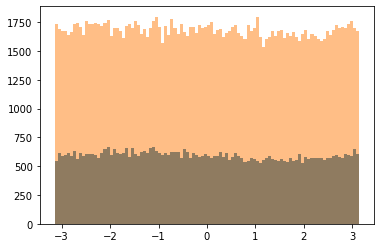

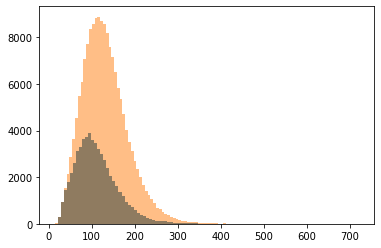

In [1103]:
'''
for i in range(tx_test_01_1.shape[1]):
    plt.figure()
    plt.hist(tx_test_01_1[:,i], bins = 100, alpha = 1)
    plt.hist(tx_test_01_2[:,i+1], bins = 100, alpha = 0.5)
    plt.show()
'''

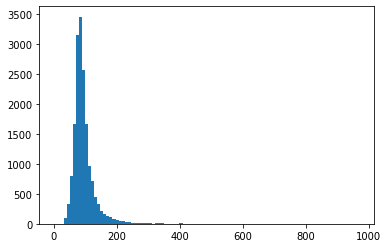

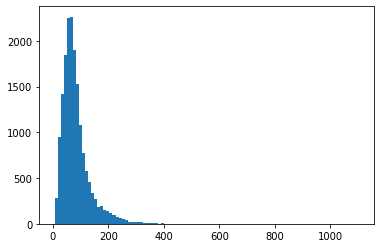

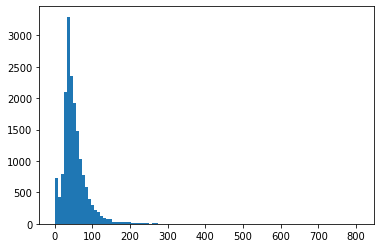

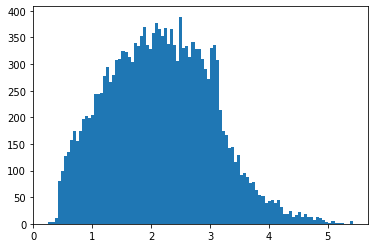

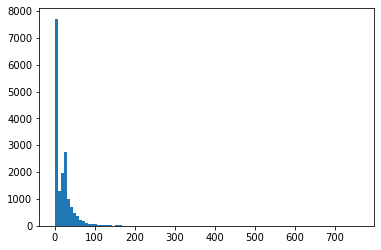

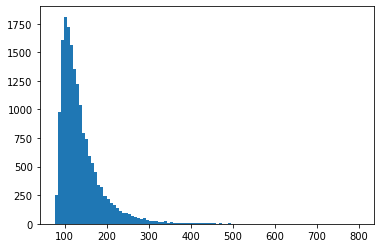

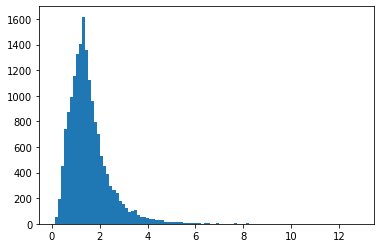

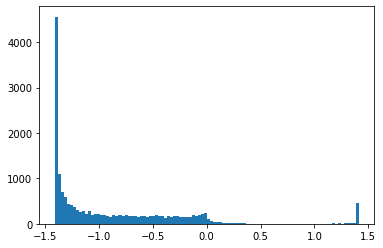

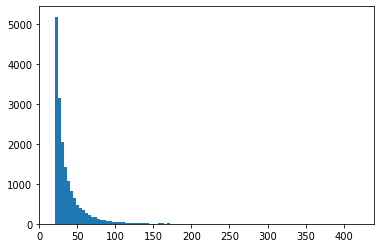

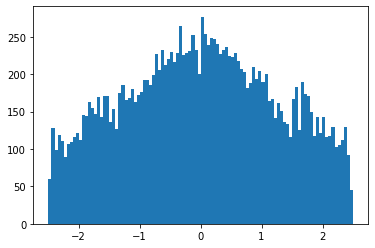

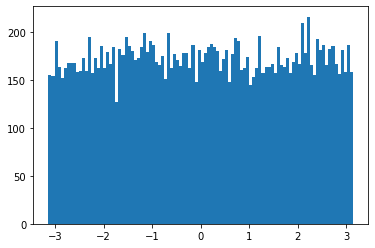

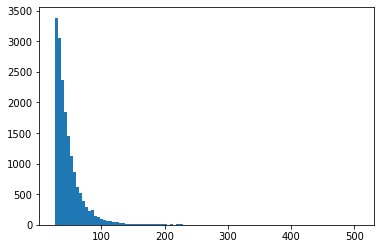

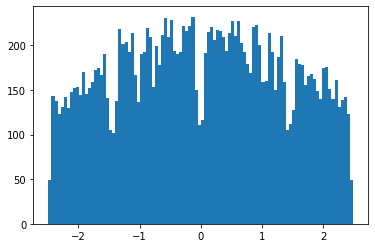

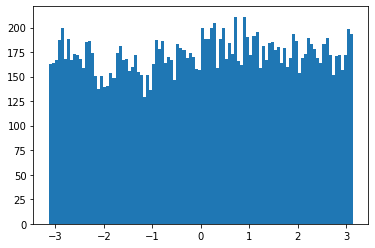

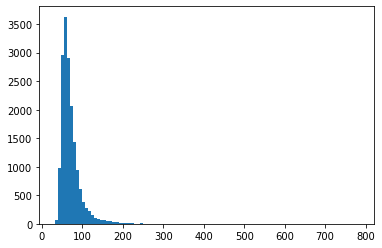

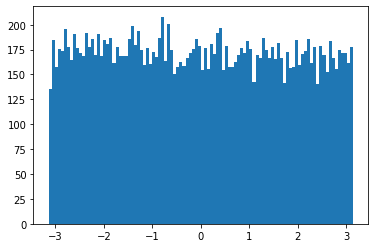

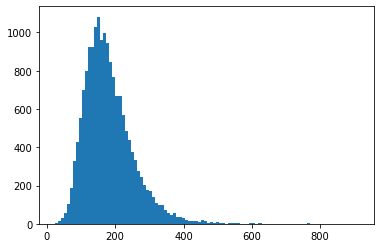

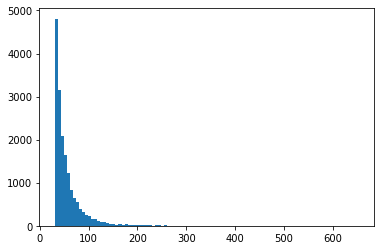

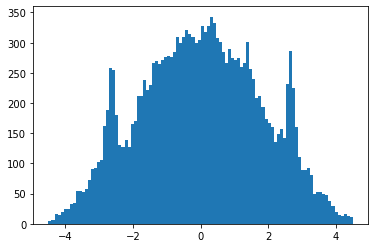

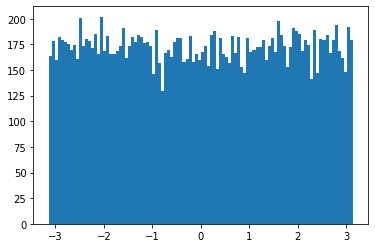

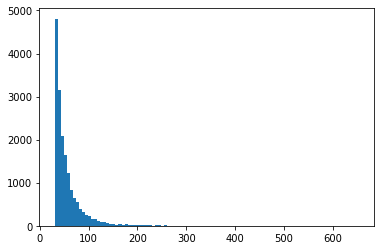

In [770]:
'''
for i in range(tx_test_11_1.shape[1]):
    plt.figure()
    plt.hist(tx_test_11_1[:,i], bins = 100)
    # plt.hist(tx_test_01_2[:,i+1], bins = 100, alpha = 0.5)
    plt.show()
'''

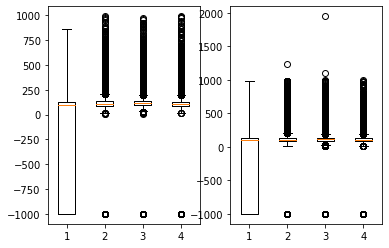

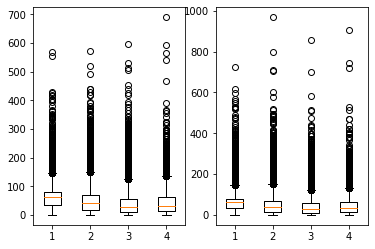

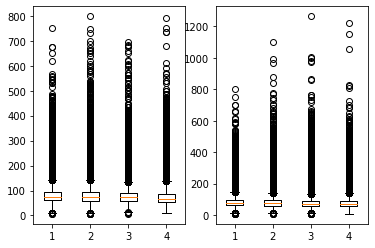

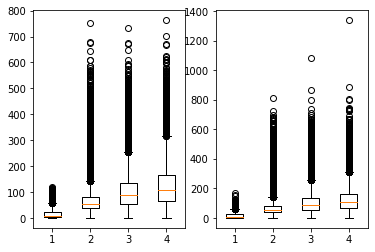

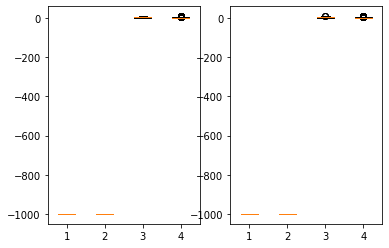

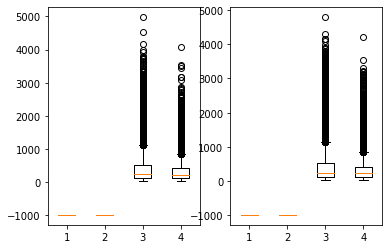

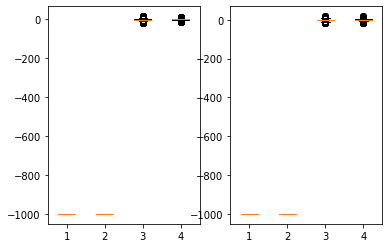

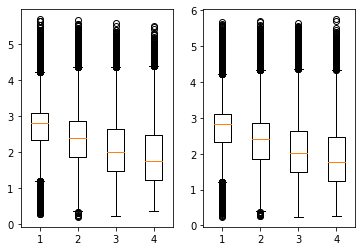

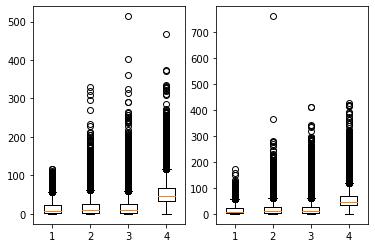

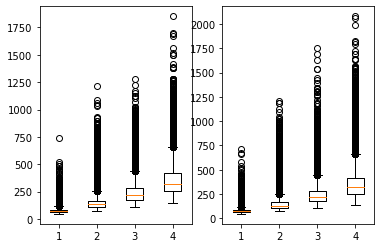

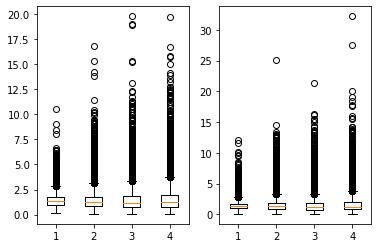

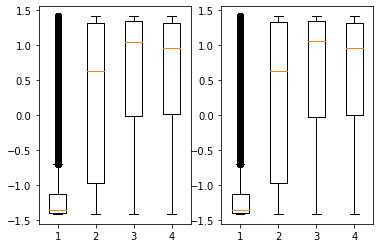

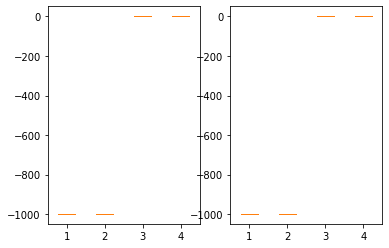

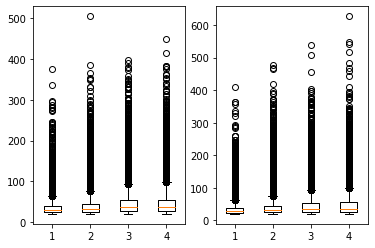

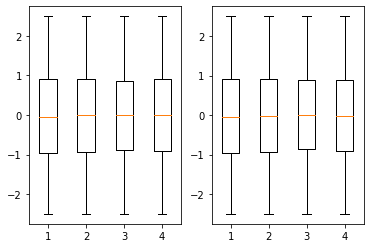

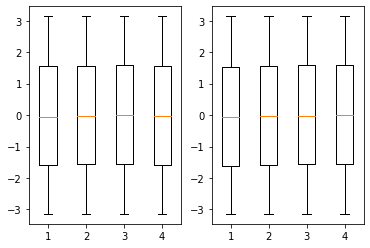

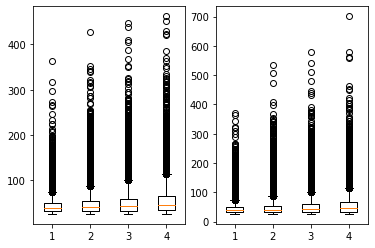

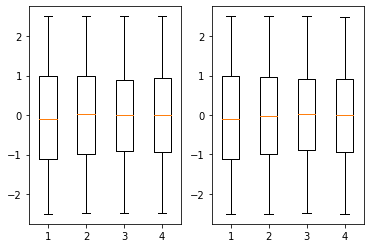

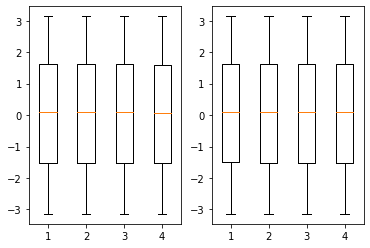

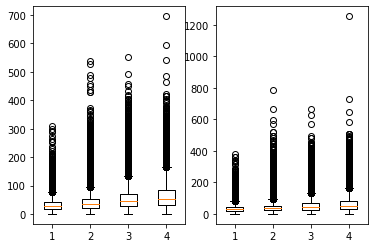

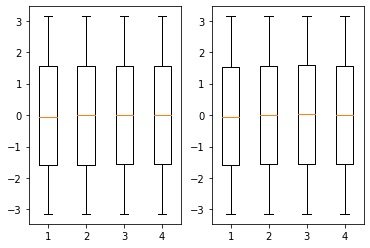

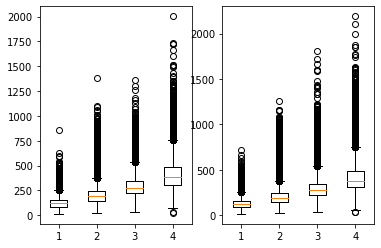

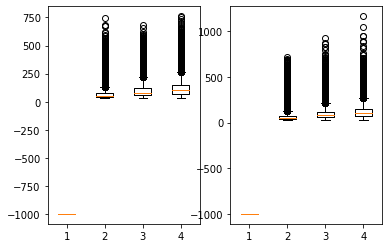

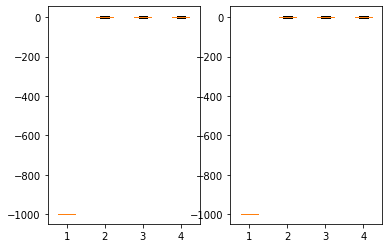

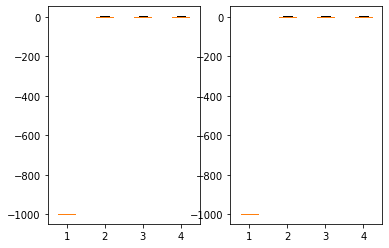

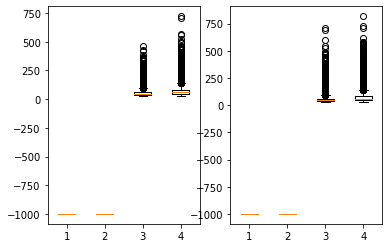

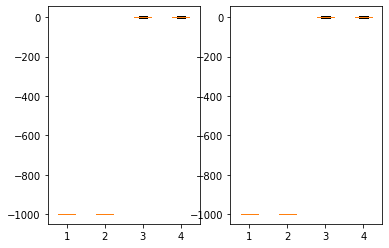

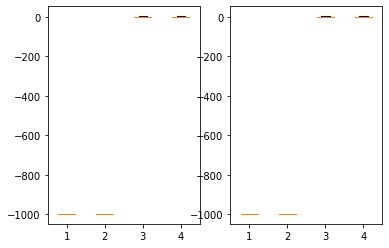

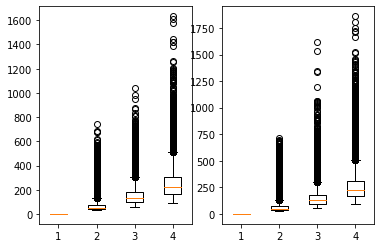

In [267]:
'''
for i in range(tx.shape[1]-1):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.boxplot([tx_01[:,i],tx_11[:,i],tx_21[:,i],tx_31[:,i]])
    plt.subplot(1, 2, 2)
    plt.boxplot([tx_test_01[:,i],tx_test_11[:,i],tx_test_21[:,i],tx_test_31[:,i]])
   # plt.scatter(range(tx_11.shape[0]),tx_11[:,i], alpha = 1)
   # plt.scatter(range(tx_21.shape[0]),tx_21[:,i], alpha = 1)
   # plt.scatter(range(tx_31.shape[0]),tx_31[:,i], alpha = 1)
    plt.show()
'''

In [146]:
# Replace -999.0 with mean of each column
# tx_test = np.where(tx_test == -999, np.ma.array(tx2, mask= (tx2 == -999)).mean(axis=0) , tx_test) 
# tx_test_0 = np.where(tx_test_01 == -999, np.ma.array(tx_01, mask= (tx_01 == -999)).mean(axis=0), tx_test_01) 
# tx_test_1 = np.where(tx_test_11 == -999, np.ma.array(tx_11, mask= (tx_11 == -999)).mean(axis=0), tx_test_11) 
# tx_test_2 = np.where(tx_test_21 == -999, np.ma.array(tx_21, mask= (tx_21 == -999)).mean(axis=0), tx_test_21) 
# tx_test_3 = np.where(tx_test_31 == -999, np.ma.array(tx_31, mask= (tx_31 == -999)).mean(axis=0), tx_test_31) 
# tX_test = np.delete(tX_test, remove_index, 1)
# tx_test = tX_test.copy() # Make a copy
# Replace -999 with nan
# tx_test = np.where(tx_test != -999, tx_test, np.nan)
# find indices where nan value is present
# inds_test = np.where(np.isnan(tx_test))
# replace inds with avg of column 
# tx_test[inds_test] = np.take(col_median, inds_test[1])

# Remove columns contain -999
# tx_test = tX_test[:, ~np.any(tX_test == -999, axis=0)]

In [279]:
# Standardize test data
# tx_test = standardize(tx_test)
# Normalize test data
# tx_test = normalize(tx_test)
tx_test_01_1, mean0_1, std0_1 = standardize(tx_test_01_1)
tx_test_01_2, mean0_2, std0_2 = standardize(tx_test_01_2)
tx_test_11_1, mean1_1, std1_1 = standardize(tx_test_11_1)
tx_test_11_2, mean1_2, std1_2 = standardize(tx_test_11_2)
tx_test_21_1, mean2_1, std2_1 = standardize(tx_test_21_1)
tx_test_21_2, mean2_2, std2_2 = standardize(tx_test_21_2)
tx_test_31_1, mean3_1, std3_1 = standardize(tx_test_31_1)
tx_test_31_2, mean3_2, std3_2 = standardize(tx_test_31_2)


In [54]:
# Augment test data
# tx_test = build_poly(np.transpose(tx_test), degree)
tx_test_01_1 = build_poly(np.transpose(tx_test_01_1), degree1_1)
tx_test_01_2 = build_poly(np.transpose(tx_test_01_2), degree1_2)
tx_test_11_1 = build_poly(np.transpose(tx_test_11_1), degree2_1)
tx_test_11_2 = build_poly(np.transpose(tx_test_11_2), degree2_2)
tx_test_21_1 = build_poly(np.transpose(tx_test_21_1), degree3_1)
tx_test_21_2 = build_poly(np.transpose(tx_test_21_2), degree3_2)
tx_test_31_1 = build_poly(np.transpose(tx_test_31_1), degree4_1)
tx_test_31_2 = build_poly(np.transpose(tx_test_31_2), degree4_2)

In [124]:
# Use your own path here!
OUTPUT_PATH = '/Users/jiaanzhu/Desktop/MLProject1/submission.csv' # TODO: fill in desired name of output file for submission
y_pred_0 = predict_labels(weights_lr_0, tx_test_0) # Use different weights here
y_pred_1 = predict_labels(weights_lr_1, tx_test_1)
y_pred_2 = predict_labels(weights_lr_2, tx_test_2)
y_pred_3 = predict_labels(weights_lr_3, tx_test_3)

# create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [2302]:
# Use your own path here!
OUTPUT_PATH = '/Users/jiaanzhu/Desktop/MLProject1/submission.csv' # TODO: fill in desired name of output file for submission
y_pred_0_1 = predict_labels(weights_ls_0_1, tx_test_01_1)
y_pred_0_2 = predict_labels(weights_ls_0_2, tx_test_01_2)
y_pred_1_1 = predict_labels(weights_ls_1_1, tx_test_11_1)
y_pred_1_2 = predict_labels(weights_ls_1_2, tx_test_11_2)
y_pred_2_1 = predict_labels(weights_ls_2_1, tx_test_21_1)
y_pred_2_2 = predict_labels(weights_ls_2_2, tx_test_21_2)
y_pred_3_1 = predict_labels(weights_ls_3_1, tx_test_31_1)
y_pred_3_2 = predict_labels(weights_ls_3_2, tx_test_31_2)

In [55]:
# Use your own path here!
OUTPUT_PATH = '/Users/jiaanzhu/Desktop/MLProject1/submission.csv' # TODO: fill in desired name of output file for submission
y_pred_0_1 = predict_labels(weights_rg_0_1, tx_test_01_1)
y_pred_0_2 = predict_labels(weights_rg_0_2, tx_test_01_2)
y_pred_1_1 = predict_labels(weights_rg_1_1, tx_test_11_1)
y_pred_1_2 = predict_labels(weights_rg_1_2, tx_test_11_2)
y_pred_2_1 = predict_labels(weights_rg_2_1, tx_test_21_1)
y_pred_2_2 = predict_labels(weights_rg_2_2, tx_test_21_2)
y_pred_3_1 = predict_labels(weights_rg_3_1, tx_test_31_1)
y_pred_3_2 = predict_labels(weights_rg_3_2, tx_test_31_2)

In [56]:
y_pred_0 = np.zeros([tx_test_01.shape[0],1])
y_pred_1 = np.zeros([tx_test_11.shape[0],1])
y_pred_2 = np.zeros([tx_test_21.shape[0],1])
y_pred_3 = np.zeros([tx_test_31.shape[0],1])

In [57]:
y_pred_0[np.where(tx_test_01[:,0] == -999)] = y_pred_0_1
y_pred_0[np.where(tx_test_01[:,0] != -999)] = y_pred_0_2
y_pred_1[np.where(tx_test_11[:,0] == -999)] = y_pred_1_1
y_pred_1[np.where(tx_test_11[:,0] != -999)] = y_pred_1_2
y_pred_2[np.where(tx_test_21[:,0] == -999)] = y_pred_2_1
y_pred_2[np.where(tx_test_21[:,0] != -999)] = y_pred_2_2
y_pred_3[np.where(tx_test_31[:,0] == -999)] = y_pred_3_1
y_pred_3[np.where(tx_test_31[:,0] != -999)] = y_pred_3_2

In [58]:
y_pred = np.zeros([tx_test.shape[0],1])
y_pred[np.where(tx_test[:,22] == 0)] = y_pred_0
y_pred[np.where(tx_test[:,22] == 1)] = y_pred_1
y_pred[np.where(tx_test[:,22] == 2)] = y_pred_2
y_pred[np.where(tx_test[:,22] == 3)] = y_pred_3

In [59]:
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
'''
Test codes below
'''

In [84]:
print(sum(y_pred == -1), sum(y_pred == 1))
print(sum(y == 0), sum(y == 1))

[471353] [96885]
164333 85667


In [20]:
#reference
print(sum(y_pred == -1), sum(y_pred == 1))
print(sum(y == -1), sum(y == 1))

[396487] [171751]
164333 85667


In [2075]:
ref 
print(sum(y_pred == -1), sum(y_pred == 1))
print(sum(y == -1), sum(y == 1))

[386702] [181536]
164333 85667


In [1190]:
Ref
print(sum(y_pred == -1), sum(y_pred == 1))
print(sum(y == -1), sum(y == 1))

[386228] [182010]
164333 85667


In [ ]:
print(sum(y_pred == -1), sum(y_pred == 1))
print(sum(y == -1), sum(y == 1))